In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
fits = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-final-var.xlsx')
guess = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-guesses.xlsx')


In [3]:
data = pd.concat([fits, guess], axis=1)

In [4]:
data.columns

Index(['Source.Name', 'final_fit_type', 'Reduced chi sq', 'c1', 'c1_err',
       'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err', 'break_point_mev',
       'break_point_err_mev', 'exp_cutoff_point_mev', 'cutoff_err_mev',
       'alpha', 'year', 'month', 'day', 'time', 'best', 'Source.Name', 'Date',
       'averaging', 'Direction', 'Data type', 'distance_au', 'STEP', 'EPT',
       'HET', 'Sigma', 'Relative error', 'Fraction of nan',
       'Leave first HET channel out', 'Shift STEP data', 'type_of_fit',
       'Fit to', 'Window', 'which_fit', 'gamma1_guess', 'gamma2_guess',
       'c1_guess', 'alpha_guess', 'break_guess_mev', 'cutoff_guess_mev',
       'Use random', 'Iterations', 'min_e_mev', 'max_e_mev'],
      dtype='object')

In [5]:
step_ept_het = data.where((data.which_fit == "best") & (data.type_of_fit == "step_ept_het") & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.which_fit == "best") & (data.type_of_fit == "step_ept") & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.which_fit == "best") & (data.type_of_fit == "ept_het")  , np.nan)
step = data.where((data.which_fit == "best") & (data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.which_fit == "best") & (data.type_of_fit == "ept") , np.nan)

one_step_ept_het = step_ept_het.where((step_ept_het.averaging == '1min'), np.nan)
two_step_ept_het = step_ept_het.where((step_ept_het.averaging == '2min'), np.nan)
five_step_ept_het= step_ept_het.where((step_ept_het.averaging == '5min'), np.nan)

one_step_ept = step_ept.where((step_ept.averaging == '1min'), np.nan)
two_step_ept = step_ept.where((step_ept.averaging == '2min'), np.nan)
five_step_ept= step_ept.where((step_ept.averaging == '5min'), np.nan)

one_ept_het = ept_het.where((ept_het.averaging == '1min'), np.nan)
two_ept_het = ept_het.where((ept_het.averaging == '2min'), np.nan)
five_ept_het= ept_het.where((ept_het.averaging == '5min'), np.nan)

one_step = step.where((step.averaging == '1min'), np.nan)
two_step = step.where((step.averaging == '2min'), np.nan)
five_step= step.where((step.averaging == '5min'), np.nan)

one_ept = ept.where((ept.averaging == '1min'), np.nan)
two_ept = ept.where((ept.averaging == '2min'), np.nan)
five_ept= ept.where((ept.averaging == '5min'), np.nan)



In [6]:
n_ept_one = str(one_ept["break_point_mev"].count())
n_ept_two = str(two_ept["break_point_mev"].count())
n_ept_five = str(five_ept["break_point_mev"].count())

n_step_ept_one = str(one_step_ept["break_point_mev"].count())
n_step_ept_five = str(five_step_ept["break_point_mev"].count())
n_step_ept_two = str(two_step_ept["break_point_mev"].count())

n_step_ept_het_one = str(one_step_ept_het["break_point_mev"].count())
n_step_ept_het_five = str(five_step_ept_het["break_point_mev"].count())
n_step_ept_het_two = str(two_step_ept_het["break_point_mev"].count())

n_ept_het_one = str(one_ept_het["break_point_mev"].count())
n_ept_het_five = str(five_ept_het["break_point_mev"].count())
n_ept_het_two = str(two_ept_het["break_point_mev"].count())

n_step_one = str(one_step["break_point_mev"].count())
n_step_five = str(five_step["break_point_mev"].count())
n_step_two = str(two_step["break_point_mev"].count())

x = range(-20,10)
y = range(-20,10)

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


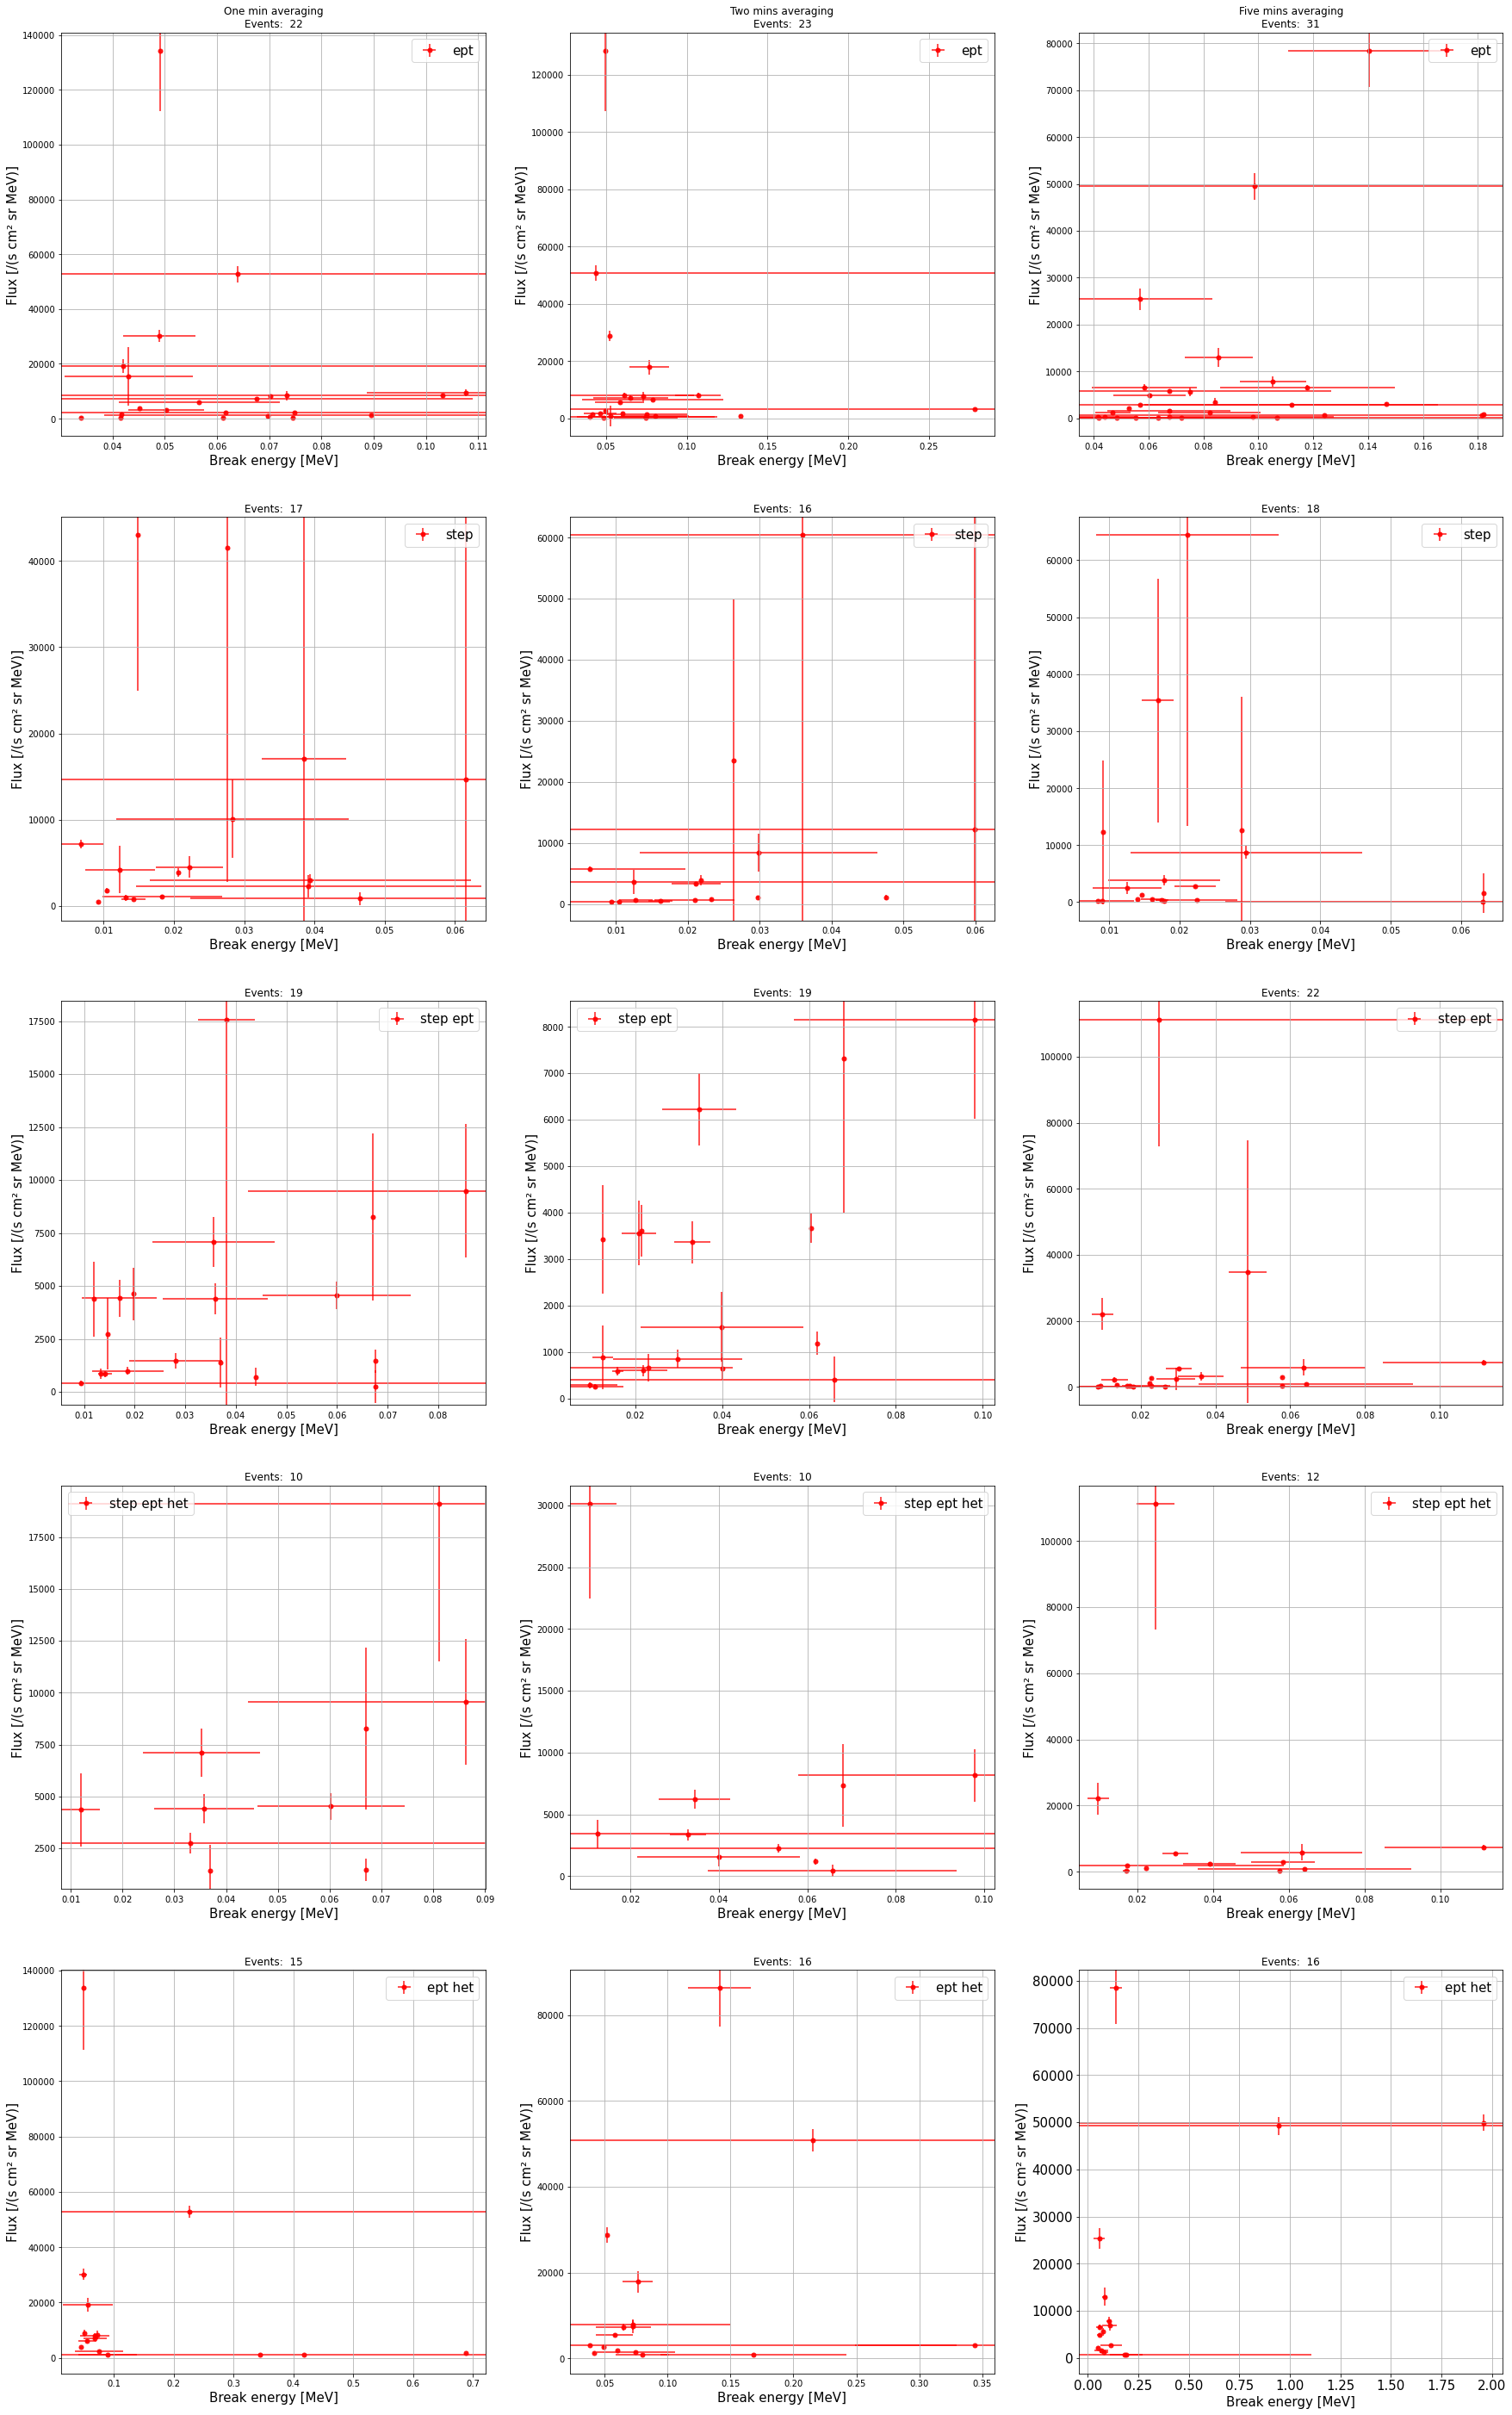

In [7]:
f, ax = plt.subplots(5,3, figsize=(30,50)) 

ax[0,0].errorbar(x=one_ept.break_point_mev, y=one_ept.c1, xerr=one_ept.break_point_err_mev, yerr=one_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,0].errorbar(x=one_step.break_point_mev, y=one_step.c1, xerr=one_step.break_point_err_mev, yerr=one_step.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,0].errorbar(x=one_step_ept.break_point_mev, y=one_step_ept.c1, xerr=one_step_ept.break_point_err_mev, yerr=one_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,0].errorbar(x=one_step_ept_het.break_point_mev, y=one_step_ept_het.c1, xerr=one_step_ept_het.break_point_err_mev, yerr=one_step_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,0].errorbar(x=one_ept_het.break_point_mev, y=one_ept_het.c1, xerr=one_ept_het.break_point_err_mev, yerr=one_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')


ax[0,0].set_title('One min averaging'+'\n'+'Events:  '+ n_ept_one)
ax[1,0].set_title('Events:  '+ n_step_one)
ax[2,0].set_title('Events:  '+ n_step_ept_one)
ax[3,0].set_title('Events:  '+ n_step_ept_het_one)
ax[4,0].set_title('Events:  '+ n_ept_het_one)

  
for i in range(5):
    ax[i,0].set_xlabel(r'Break energy [MeV]', size=15)
    ax[i,0].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
    ax[i,0].grid()
    ax[i,0].legend(prop={'size': 15})
    #ax[i,0].plot(x,y, color = 'black')
    #ax[i,0].set_xlim(-6,0)
    #ax[i,0].set_ylim(-6,0)



ax[0,1].errorbar(x=two_ept.break_point_mev, y=two_ept.c1, xerr=two_ept.break_point_err_mev, yerr=two_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,1].errorbar(x=two_step.break_point_mev, y=two_step.c1, xerr=two_step.break_point_err_mev, yerr=two_step.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,1].errorbar(x=two_step_ept.break_point_mev, y=two_step_ept.c1, xerr=two_step_ept.break_point_err_mev, yerr=two_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,1].errorbar(x=two_step_ept_het.break_point_mev, y=two_step_ept_het.c1, xerr=two_step_ept_het.break_point_err_mev, yerr=two_step_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,1].errorbar(x=two_ept_het.break_point_mev, y=two_ept_het.c1, xerr=two_ept_het.break_point_err_mev, yerr=two_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

ax[0,1].set_title('Two mins averaging'+'\n'+'Events:  '+ n_ept_two)
ax[1,1].set_title('Events:  '+ n_step_two)
ax[2,1].set_title('Events:  '+ n_step_ept_two)
ax[3,1].set_title('Events:  '+ n_step_ept_het_two)
ax[4,1].set_title('Events:  '+ n_ept_het_two)
    
for i in range(5):
    ax[i,1].set_xlabel(r'Break energy [MeV]', size=15)
    ax[i,1].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
    ax[i,1].grid()
    ax[i,1].legend(prop={'size': 15})
    #ax[i,1].plot(x,y, color = 'black')
    #ax[i,1].set_xlim(-6,0)
    #ax[i,1].set_ylim(-6,0)



ax[0,2].errorbar(x=five_ept.break_point_mev, y=five_ept.c1, xerr=five_ept.break_point_err_mev, yerr=five_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept')#, label='Flux average')
ax[1,2].errorbar(x=five_step.break_point_mev, y=five_step.c1, xerr=five_step.break_point_err_mev, yerr=five_step.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step')#, label='Flux average')
ax[2,2].errorbar(x=five_step_ept.break_point_mev, y=five_step_ept.c1, xerr=five_step_ept.break_point_err_mev, yerr=five_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept')#, label='Flux average')
ax[3,2].errorbar(x=five_step_ept_het.break_point_mev, y=five_step_ept_het.c1, xerr=five_step_ept_het.break_point_err_mev, yerr=five_step_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')
ax[4,2].errorbar(x=five_ept_het.break_point_mev, y=five_ept_het.c1, xerr=five_ept_het.break_point_err_mev, yerr=five_ept_het.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'ept het')#, label='Flux average')

#ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[0,2].set_title('Five mins averaging'+'\n'+'Events:  '+ n_ept_five)
ax[1,2].set_title('Events:  '+ n_step_five)
ax[2,2].set_title('Events:  '+ n_step_ept_five)
ax[3,2].set_title('Events:  '+ n_step_ept_het_five)
ax[4,2].set_title('Events:  '+ n_ept_het_five)
    

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
for i in range(5):
    ax[i,2].set_xlabel(r'Break energy [MeV]', size=15)
    ax[i,2].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
    ax[i,2].grid()
    ax[i,2].legend(prop={'size': 15})
    #ax[i,2].plot(x,y, color = 'black')
    #ax[i,2].set_xlim(-6,0)
    #ax[i,2].set_ylim(-6,0)




plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()


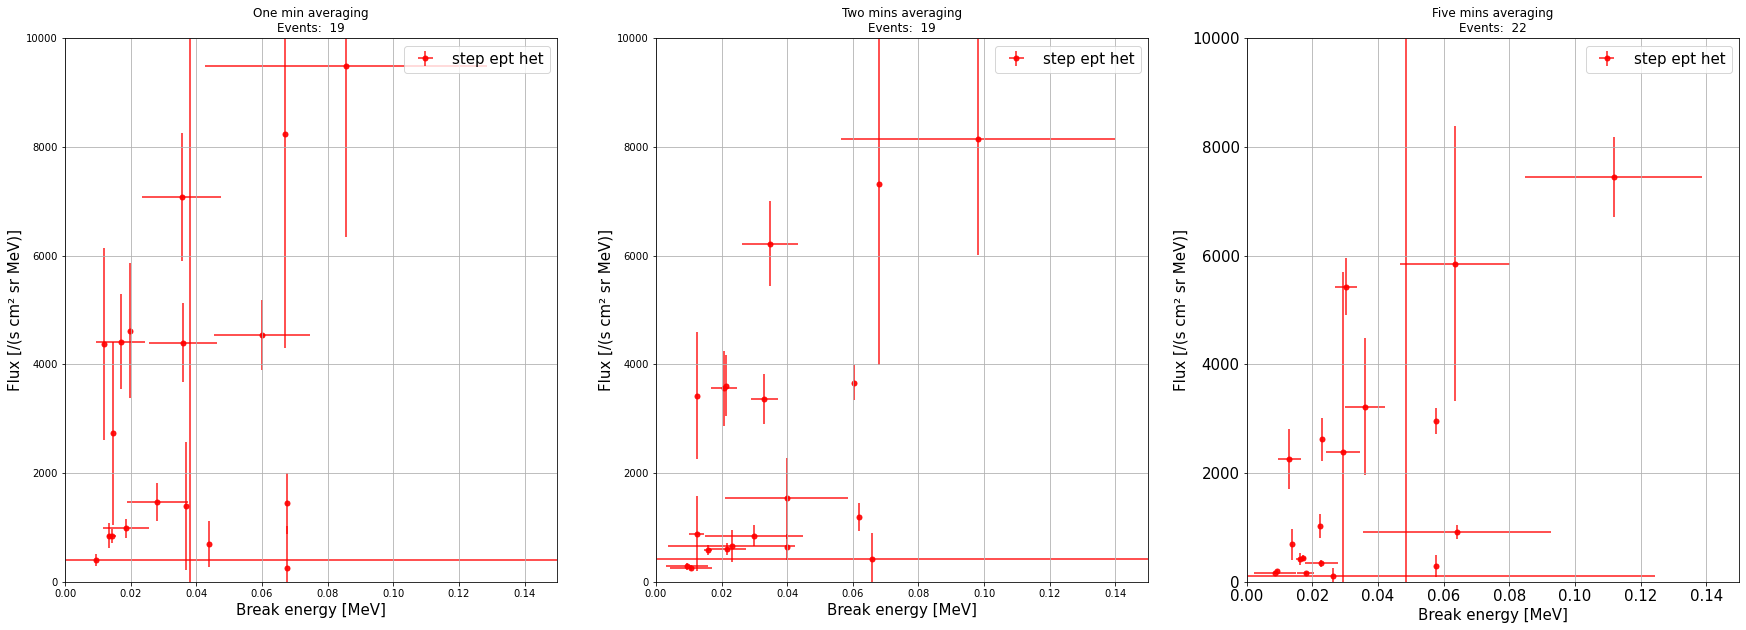

In [8]:
f, ax = plt.subplots(1,3, figsize=(30,10)) 

ax[0].errorbar(x=one_step_ept.break_point_mev, y=one_step_ept.c1, xerr=one_step_ept.break_point_err_mev, yerr=one_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')

ax[0].set_title('One min averaging'+'\n'+'Events:  '+ n_step_ept_one)
  
ax[0].set_xlabel(r'Break energy [MeV]', size=15)
ax[0].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
ax[0].grid()
ax[0].legend(prop={'size': 15})
    #ax[i,0].plot(x,y, color = 'black')
ax[0].set_xlim(0,0.15)
ax[0].set_ylim(0,10000)



ax[1].errorbar(x=two_step_ept.break_point_mev, y=two_step_ept.c1, xerr=two_step_ept.break_point_err_mev, yerr=two_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')

ax[1].set_title('Two mins averaging'+'\n'+'Events:  '+ n_step_ept_two)
    
ax[1].set_xlabel(r'Break energy [MeV]', size=15)
ax[1].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
ax[1].grid()
ax[1].legend(prop={'size': 15})
    #ax[i,1].plot(x,y, color = 'black')
ax[1].set_xlim(0,0.15)
ax[1].set_ylim(0,10000)



ax[2].errorbar(x=five_step_ept.break_point_mev, y=five_step_ept.c1, xerr=five_step_ept.break_point_err_mev, yerr=five_step_ept.c1_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'step ept het')#, label='Flux average')

#ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')
ax[2].set_title('Five mins averaging'+'\n'+'Events:  '+ n_step_ept_five)

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[2].set_xlabel(r'Break energy [MeV]', size=15)
ax[2].set_ylabel(r'Flux [/(s cm² sr MeV)]', size=15)  
ax[2].grid()
ax[2].legend(prop={'size': 15})
    #ax[i,2].plot(x,y, color = 'black')
ax[2].set_xlim(0,0.15)
ax[2].set_ylim(0,10000)




plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()
